In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [15]:
def loading(X_train):
  return tqdm(enumerate(X_train), total=len(X_train), desc="Processing")

In [3]:
from google.colab import drive
drive.mount('/content/drive')
! unzip /content/drive/MyDrive/copy-of-artificial-neural-networks-competition.zip

Mounted at /content/drive
Archive:  /content/drive/MyDrive/copy-of-artificial-neural-networks-competition.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train_mpst.csv          
  inflating: val.csv                 


In [4]:
import numpy as np
train = pd.read_csv("train_mpst.csv")
test = pd.read_csv('test.csv', error_bad_lines=False, warn_bad_lines=True)
val = pd.read_csv("val.csv")
#print(test.head())
ID = test['imdb_id']
ID =pd.DataFrame(ID)
ID.to_csv('/content/drive/MyDrive/RA_TEMP/test1.csv', index=False)

<ipython-input-4-8157a95f74a1>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test = pd.read_csv('test.csv', error_bad_lines=False, warn_bad_lines=True)
<ipython-input-4-8157a95f74a1>:3: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  test = pd.read_csv('test.csv', error_bad_lines=False, warn_bad_lines=True)


In [ ]:
train.describe()

,absurd,action,adult comedy,allegory,alternate history,alternate reality,anti war,atmospheric,autobiographical,avant garde,...,sentimental,storytelling,stupid,suicidal,suspenseful,thought-provoking,tragedy,violence,western,whimsical
count,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,...,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000,9489.000000
mean,0.017810,0.044578,0.008642,0.009801,0.006745,0.013595,0.007482,0.027822,0.002951,0.016651,...,0.016440,0.024555,0.011698,0.002951,0.069660,0.008431,0.038993,0.296449,0.005164,0.005796
std,0.132268,0.206386,0.092562,0.098518,0.081853,0.115807,0.086181,0.164470,0.054244,0.127966,...,0.127167,0.154772,0.107527,0.054244,0.254586,0.091436,0.193587,0.456715,0.071678,0.075916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-11-dd5db8dc5412>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['action'], kde=False, hist_kws={"alpha": 0.5}, label='PM2.5')


<Axes: xlabel='action'>

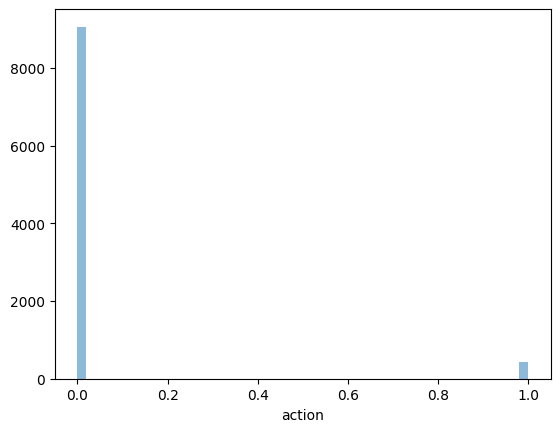

In [ ]:
sns.distplot(train['action'], kde=False, hist_kws={"alpha": 0.5}, label='PM2.5')

In [8]:
# Assuming df is your DataFrame with 'title', 'plot_synopsis', and genre columns
X = train['plot_synopsis']
y = train.drop(['title', 'plot_synopsis','imdb_id','synopsis_source'], axis=1)

X_pred = test['plot_synopsis']
#y.head()

In [ ]:
k = 0
p = 0
for index, row in y.iterrows():
    count_ones = row.sum()

    if count_ones >= 30:
        k+=1
        #print(f"At least two values in row {index} are equal to 1.")
    else:
       p+=1
      #  print(f"Row {index} does not have at least two values equal to 1.")

print(k,p)

0 9489


Roberta Torch Classification

In [5]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

# Load pre-trained model and tokenizer
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

# Tokenize input text
input_text = "I love using RoBERTa for sentiment analysis."
encoded_text = tokenizer(input_text, return_tensors='pt')

# Make predictions
output = model(**encoded_text)
scores = output.logits

# Get predicted class
predicted_class = torch.argmax(scores, dim=1).item()

# Interpret results
print(f"Predicted Sentiment Class: {predicted_class}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Predicted Sentiment Class: 1


# **Data PreProcessing And Encodeing**

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert genres into binary labels using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_binary = mlb.fit_transform(y.values)


# Text preprocessing and vectorization
max_len = 200
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(X_test_tfidf)
X_pred_tfidf = tfidf_vectorizer.transform(X_pred)

In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util
import torch
model_name = "sentence-transformers/all-roberta-large-v1"
model = SentenceTransformer(model_name)
s1 = "That is a happy person."
emb_1 = model.encode(s1)
X_train_emb = []
for i in loading(X_train):
  print()
  emb = model.encode(i)
  X_train_emb.append(emb)
X_test_emb = []
for j in loading(X_test):
  print(j)
  emb = model.encode(j)
  X_test_emb.append(emb)

In [ ]:
from scipy.sparse import hstack

X_train_emb_np = np.vstack(X_train_emb)
X_test_emb_np = np.vstack(X_test_emb)
X_com = hstack([X_train_tfidf, X_train_emb_np])
X_com_test = hstack([X_test_tfidf, X_test_emb_np])

# **Model Preparing**

In [11]:
from transformers import RobertaTokenizer, TFRobertaForSequenceClassification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [25]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
roberta_model = TFRobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=71)

input_text = "I love using RoBERTa for text classification."
encoded_text = tokenizer(input_text, return_tensors='tf')
print(encoded_text)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predicti

{'input_ids': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=
array([[    0,   100,   657,   634,  3830, 11126, 38495,    13,  2788,
        20257,     4,     2]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 12), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}


In [26]:
model = Sequential([
    roberta_model.roberta,
    Flatten(),
    Dense(71, activation='softmax')  # Adjust the output size based on the number of classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [69]:
x_train = []
y_train = y_train

for index, X1 in loading(X_train):

  x_train_tokens = tokenizer(X1, truncation=True, padding=True, return_tensors="tf")
  x_train.append(x_train_tokens)



Processing: 100%|██████████| 7591/7591 [01:17<00:00, 98.38it/s] 


In [73]:

type(x_train)

numpy.ndarray

In [71]:
X_input_id = []
X_attention_mask = []
for i , value in enumerate(loading(x_train)):
  id = x_train[i]['input_ids'].numpy().flatten()
  X_input_id.append(id)
  attention_mask = x_train[i]['attention_mask'].numpy().flatten()
  X_attention_mask.append(attention_mask)

Processing: 100%|██████████| 7591/7591 [00:00<00:00, 83716.68it/s]


In [81]:
x_train = np.array(x_train)
print(len(X_input_id))

7591


In [ ]:
x_train[:, 0] = X_input_id
x_train[:, 1] = X_attention_mask
print(x_train[2:][0])

In [ ]:
input_ids = x_train[0]['input_ids'].numpy().flatten()
attention_mask = x_train[0]['attention_mask'].numpy().flatten()
print(input_ids)
print(attention_mask)

In [93]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad the sequences in X_input_id to the maximum length
max_length = max(len(x) for x in X_input_id)
X_input_id = pad_sequences(X_input_id, maxlen=max_length, padding='post')

# Convert the padded list to a NumPy array
X_train_id = np.array(X_input_id)
type(y_train)

numpy.ndarray

In [94]:

batch = 64
num_epochs = 5
model.fit(X_train_id, y_train, epochs=num_epochs, batch_size=batch)

Epoch 1/5


AttributeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py", line 87, in call
        input_shape = inputs.shape

    AttributeError: Exception encountered when calling layer 'flatten_1' (type Flatten).
    
    'TFBaseModelOutputWithPoolingAndCrossAttentions' object has no attribute 'shape'
    
    Call arguments received by layer 'flatten_1' (type Flatten):
      • inputs=TFBaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state='tf.Tensor(shape=(None, 512, 768), dtype=float32)', pooler_output=None, past_key_values=None, hidden_states=None, attentions=None, cross_attentions=None)


In [22]:
# Neural network model
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100)))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 5
history = model.fit(pad_sequences(x_train.toarray(), maxlen=max_len),
                    y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(pad_sequences(X_com_test.toarray(), maxlen=max_len), y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [ ]:
X_test_padded = pad_sequences(X_pred_tfidf.toarray(), maxlen=max_len)
y_pred_probs = model.predict(X_test_padded)
print(len(y_pred_probs))
#for i in

93/93 [==============================] - 15s 149ms/step
2966


In [ ]:
print(y_pred_probs[0])

[0.02452771 0.04064121 0.00726128 0.01118794 0.00614653 0.0155333
 0.01096947 0.03021389 0.00240751 0.01759492 0.00422213 0.01414075
 0.03859589 0.0076945  0.00266479 0.00593087 0.00487612 0.13679433
 0.00640685 0.02109237 0.23465373 0.00986564 0.02891642 0.01769695
 0.02527719 0.03723714 0.02348329 0.00349093 0.20560947 0.05043543
 0.03204334 0.00587052 0.00990786 0.01537508 0.01085631 0.01296042
 0.03338903 0.05606005 0.05562724 0.00695343 0.01150105 0.00261507
 0.04705414 0.49301314 0.03412231 0.03726677 0.00174906 0.03681849
 0.01745574 0.01426278 0.01009842 0.01999943 0.09804215 0.01480785
 0.00689472 0.01617926 0.18796514 0.21048358 0.03799494 0.05980863
 0.01694954 0.0177066  0.01970678 0.01528761 0.00248853 0.09323855
 0.00704355 0.04273174 0.31463262 0.00470438 0.00603049]


In [ ]:
import numpy as np
result = []
for i in range(len(y_pred_probs)):
  prob = np.array(y_pred_probs[i])
  max_index = np.argmax(prob)
  binary_result = np.zeros_like(prob)
  binary_result[max_index] = 1
  binary_result = binary_result.tolist()
  result.append(binary_result)
  #for j in range(len(binary_result))

type(result[0])


list

In [ ]:
Export = pd.DataFrame(result)#, axis=1)
Export.head()
Export.to_csv('/content/drive/MyDrive/ANN_by_CNN.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text preprocessing and vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Multi-label classification model
classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = classifier.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred, target_names=y.columns))

                    precision    recall  f1-score   support

            absurd       0.00      0.00      0.00        37
            action       0.57      0.05      0.09        87
      adult comedy       0.00      0.00      0.00        13
          allegory       0.00      0.00      0.00        21
 alternate history       0.00      0.00      0.00        14
 alternate reality       0.00      0.00      0.00        26
          anti war       0.00      0.00      0.00        11
       atmospheric       0.00      0.00      0.00        58
  autobiographical       0.00      0.00      0.00        10
       avant garde       0.00      0.00      0.00        35
    blaxploitation       0.00      0.00      0.00        11
             bleak       0.00      0.00      0.00        28
            boring       0.00      0.00      0.00        72
      brainwashing       0.00      0.00      0.00        15
    christian film       0.00      0.00      0.00         6
    claustrophobic       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 4.11%


In [ ]:
print(y_pred.shape)
Y = pd.DataFrame(y_pred)
Y.to_csv("/content/drive/MyDrive/ANN.csv",index=False)

(1898, 71)
